## Classification

### Preparation

Untuk persiapan, kita akan memanggil seluruh library yang akan kita pakai pada project kali ini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
train_data = pd.read_csv('emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('emnist-bymerge-test.csv', header=None)

In [3]:
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int')
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')

In [4]:
max_samples = 1000
if len(X_train) > max_samples:
    X_train = X_train[:max_samples]
    y_train = y_train[:max_samples]

In [5]:
if len(X_test) > max_samples:
    X_test = X_test[:max_samples]
    y_test = y_test[:max_samples]

In [6]:
hog_features_train = []
hog_images_train = []
for image in X_train:
    feature, hog_img = hog(image.reshape((28,28)),
                           orientations=9,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           visualize=True,
                           block_norm='L2')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)

hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

hog_features_test = []
hog_images_test = []
for image in X_test:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations=9,
                           pixels_per_cell=(8,8),
                           cells_per_block=(2, 2),
                           visualize=True,
                           block_norm='L2')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)

hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)


In [7]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)

In [8]:
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

In [9]:
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)

In [10]:
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted')
loo_recall = recall_score(y_train, y_pred, average='weighted')
loo_f1 = f1_score(y_train, y_pred, average='weighted')

c:\Users\Kevin Tobing\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
print("/nLOOCV Result (Training Data):")
print("Confusion Matrix:")
print(loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)

/nLOOCV Result (Training Data):
Confusion Matrix:
[[41  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 16  1]
 [ 0  0  1 ...  0  0 16]]
Accuracy: 0.625
Precision: 0.5620162931674574
Recall: 0.625
F1 Score: 0.5709567283612091


In [13]:
def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize=(10,10))
    plot_confusion_matrix(conf_mat=cm, ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

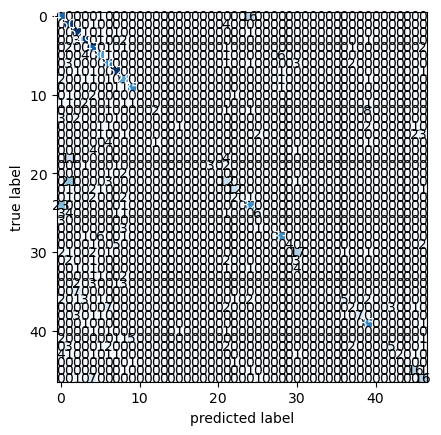

In [14]:
plot_confusion_matrix(loo_confusion_matrix)

In [15]:
def plot_images_with_hog(X, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize=(15,5))
    fig.suptitle(title)

    for i in range(min(len(X), 10)):
        axes[0, i].imshow(X[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    for i in range(min(len(hog_images),10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

In [18]:
def extract_hog_images(images):
    hog_images = []
    for image in images:
        hog_img = hog(image.reshape((28, 28)),
                      orientation=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True,
                      block_norm='L2')
        
        hog_images.append(hog_img)
    return np.array(hog_images)

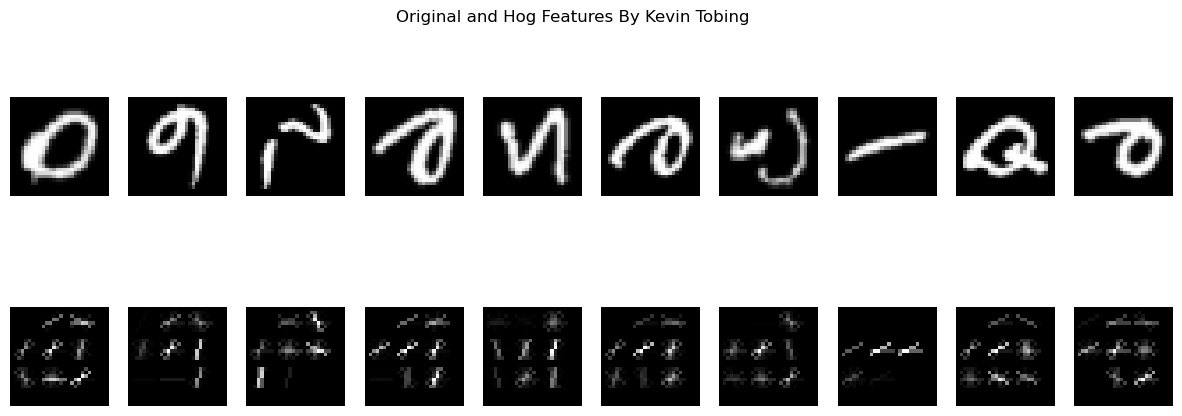

In [23]:
plot_images_with_hog(X_train, hog_images_train, title='Original and Hog Features By Kevin Tobing')